### Instalações necessárias

In [3]:
%pip install -q numpy matplotlib pandas seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


### Algoritmos usados
- Regressão Linear - regressão
- Regressão Logistica - classificação

<img src=https://miro.medium.com/v2/resize:fit:1400/1*lnWfrrvR8qkANHombhQMTQ.png width=700>


[Referência](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

In [2]:
# imports necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

# modelos e dados
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

# regressão
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#classificação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



## Leitura e tratamento
- Dataset [USA housing](https://www.kaggle.com/datasets/praneykalra/usa-housing-dataset)

In [3]:
houses = pd.read_csv('./USA_Housing.csv')

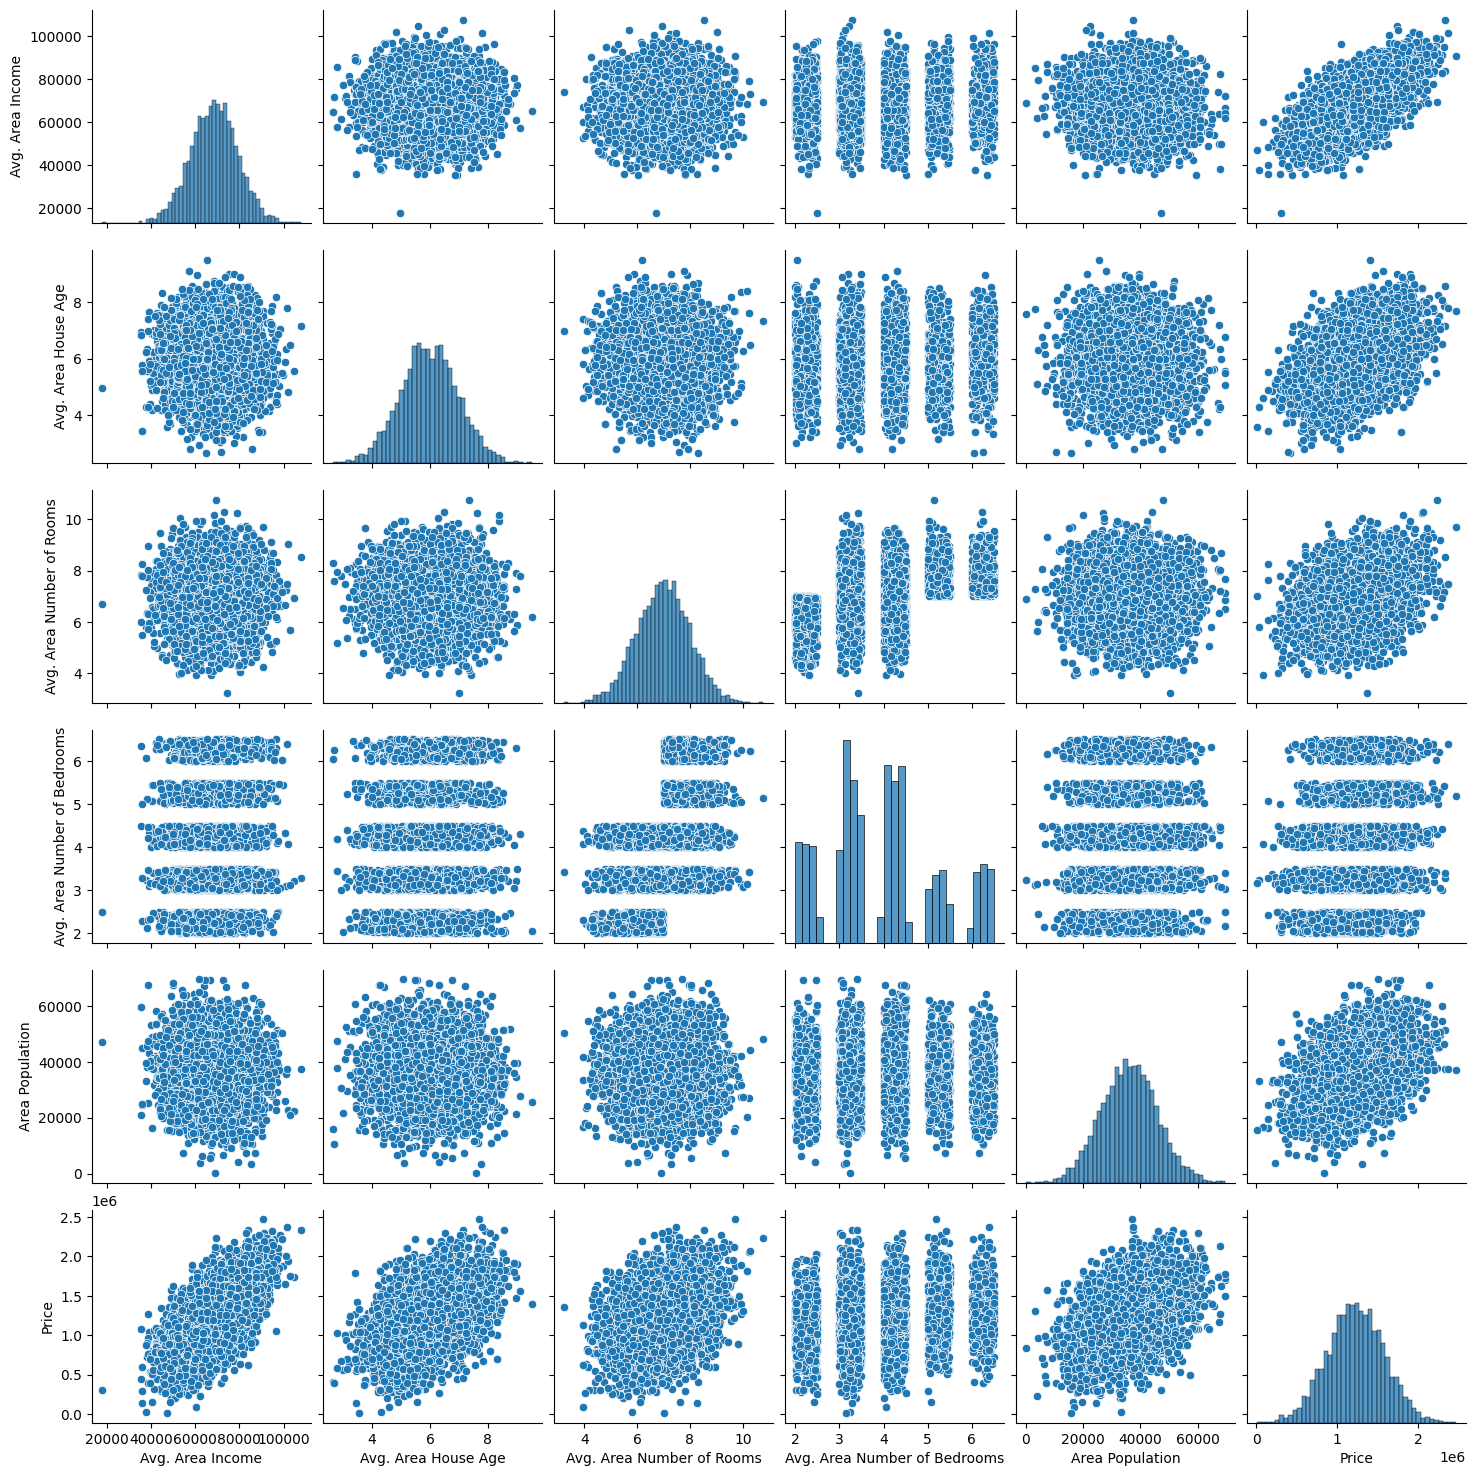

In [4]:
sns.pairplot(houses)

In [5]:
houses.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


In [6]:
# Regressão linear
model = LinearRegression()
X = houses.drop(columns='Price')
y = houses['Price']

In [7]:
X_train, X_teste, y_train, y_teste = train_test_split(X, y, train_size = 0.75, random_state = 42)

In [8]:
# fit do modelo
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_teste)

In [10]:
y_pred[:10]

array([1308500.26590582, 1236863.1731098 , 1244410.75071379,
       1228858.01561812, 1061128.29826601, 1542832.82813403,
       1094260.92880744,  833093.09177786,  788651.33493042,
       1469139.73406279])

### Avaliar o modelo de regressão

- [5 Regression Metrics Explained in Just 5 minutes](https://pub.towardsai.net/regression-metrics-6690815bb51f)

<img src=https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ug7uflGlIAjFe6lFMACnfA.png width=600>

In [11]:
# metricas
r2_score(y_teste, y_pred)

0.9169678829400086

In [12]:
mean_absolute_error(y_teste,y_pred)

np.float64(80859.62542338607)

In [13]:
pd.DataFrame(data={"y_test": y_teste, "y_pred": y_pred}).round(2)

,y_test,y_pred
1501,1339096.08,1308500.27
2586,1251794.18,1236863.17
2653,1340094.97,1244410.75
1055,1431507.62,1228858.02
705,1042373.52,1061128.30
...,...,...
4141,1730103.13,1741027.04
3168,1675702.22,1652433.05
2478,1440909.00,1261463.86
4214,1047280.11,1076336.43


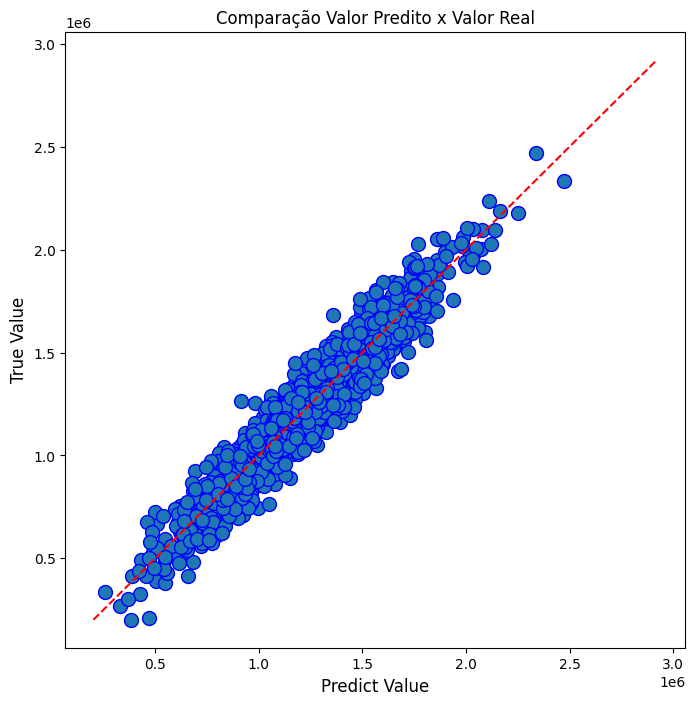

In [14]:
## define tamanho da figura
fig = plt.figure(figsize=(8,8))

# Configurações do plot
l = plt.plot(y_pred, y_teste, 'bo') # Define os eixos x e y. O argumento 'bo' indica que queremos que os elementos
                                    # apareçam como circulos azuis
plt.setp(l, markersize=10)          # Aqui definimos o tamanho dos circulos
plt.setp(l, markerfacecolor='C0')   # Aqui definimos a cor do contorno

## Titulo e eixos
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

## Aqui definimos a equação da reta de aproximação e adicionamos ela no plot
xl = np.arange(min(y_teste), 1.2*max(y_teste),(max(y_teste)-min(y_teste))/10)
yl = xl
plt.plot(xl, yl, 'r--')

## Exibição
plt.show()

## Classificação

In [17]:
# carregar dataset
penguins = sns.load_dataset('penguins')

In [19]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [20]:
penguins.dropna(inplace=True)

In [21]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [22]:
## Quantidade de espécies - classes (target)
penguins['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [23]:
penguins['species'].value_counts(normalize=True)

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: proportion, dtype: float64

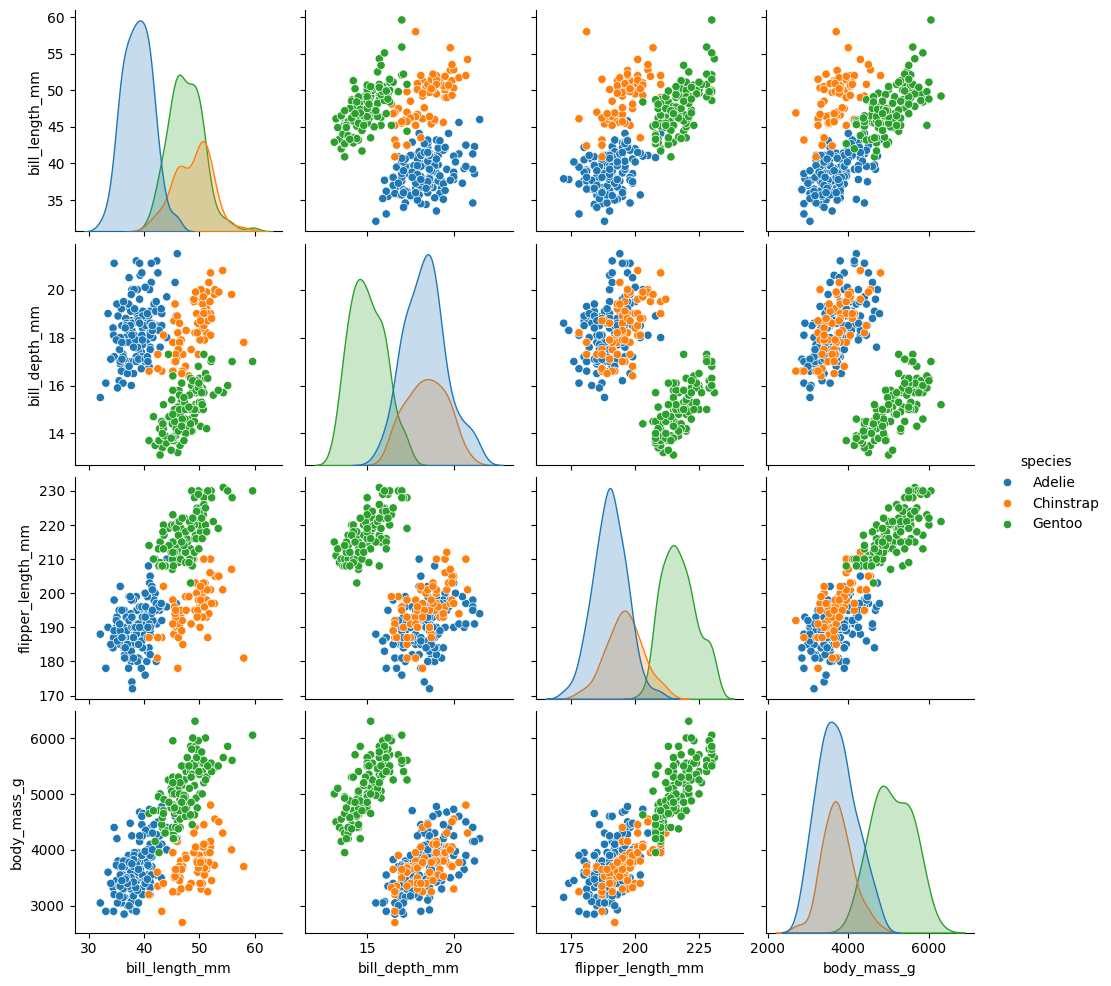

In [24]:
sns.pairplot(penguins, hue='species')

## separação dos datasets em target e features

In [25]:
X = penguins.drop(['species', 'island', 'sex'], axis = 1)
y = penguins['species']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, stratify = y)

In [27]:
# treinar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Vitor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)
y_pred[:10]

array(['Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo'], dtype=object)

## Matriz de confusão

<Axes: xlabel='Predicted', ylabel='Actual'>

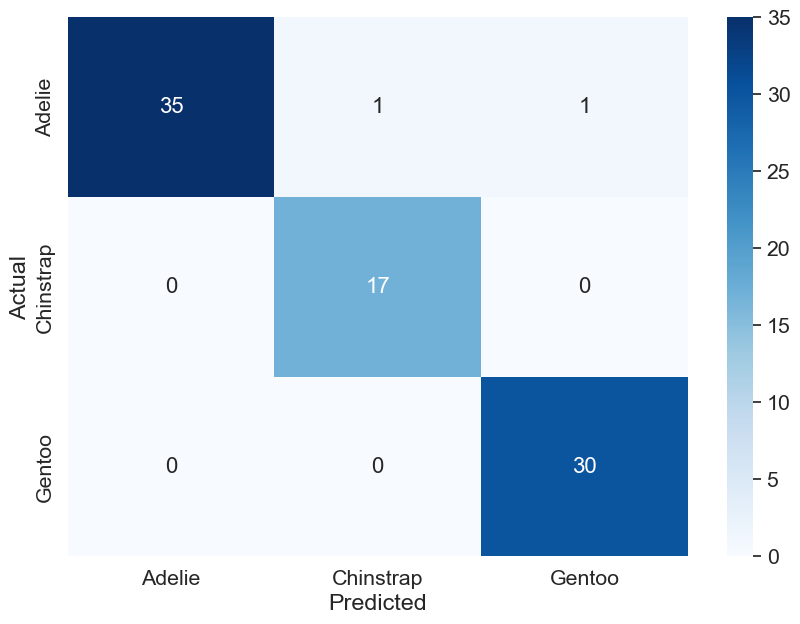

In [29]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

### Métricas de avaliação - classificação

<img src=https://www.researchgate.net/profile/Shuaibing-Li-3/publication/381679539/figure/fig4/AS:11431281254966924@1719364190811/Diagram-illustrating-the-calculation-of-metrics-accuracy-precision-recall-and.png>

[Referencia](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.95      0.97        37
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.98        84
   macro avg       0.97      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



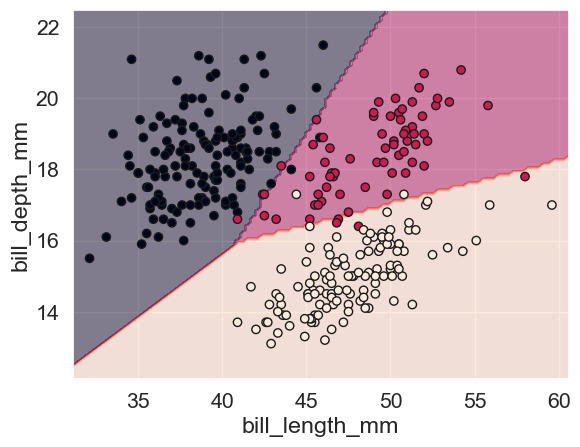

In [33]:
# Fronteira de decisão do modelo

from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

X = X[["bill_length_mm", "bill_depth_mm"]]
classifier = LogisticRegression().fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=X.columns[0], ylabel=X.columns[1],
    alpha=0.5,
)


le = LabelEncoder()
colors = le.fit_transform(y)
disp.ax_.scatter(X["bill_length_mm"], X["bill_depth_mm"], c=list(colors), edgecolor="k")
plt.show()

## Exercicio

#### Pegue o dataset do link

https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

Faça um modelo para avaliar se a pessoa tem diabetes ou não, faça o fluxo completo de pensamento: 

1. Explore os dados
2. Veja se eles precisam de ajustes
3. Escolham as features adequadas para o treino
4. Treine o modelo
5. Escolha uma métrica que melhor se adeque ao problema e avalie o modelo
6. Discuta se colocaria o modelo em produção ou não

In [9]:
data = pd.read_csv('./diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.drop(columns=['gender','smoking_history'], inplace=True)

In [5]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [6]:
X , y = 

X_train, X_test, y_Train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [64]:
model = LogisticRegression()

C:\Users\Vitor\AppData\Local\Temp\ipykernel_3880\976864309.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['smoking_history'] = data['smoking_history'].replace(sub)


In [60]:
model.fit(X_train,y_train)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
1,Female,54.0,0,0,9,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,1,23.45,5.0,155,0
4,Male,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,9,27.32,6.2,90,0
99996,Female,2.0,0,0,9,17.37,6.5,100,0
99997,Male,66.0,0,0,2,27.83,5.7,155,0
99998,Female,24.0,0,0,0,35.42,4.0,100,0


In [66]:
y_pred = model.predict(X_teste)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

In [7]:
from sklearn.preprocessing import OneHotEncoder


In [10]:
columns_cat = data.select_dtypes(include=['object']).columns
columns_cat

Index(['gender', 'smoking_history'], dtype='object')

In [26]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_encoder = encoder.fit_transform(data[columns_cat])


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [22]:
newdata = pd.DataFrame(X_encoder, columns=encoder.get_feature_names_out(columns_cat))

ValueError: Shape of passed values is (100000, 1), indices imply (100000, 9)

In [14]:
df = pd.concat([data.drop(columns=['gender', 'smoking_history']), newdata] axis=1)
df.head()

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [ ]:
X,y = df.drop(columns=['diabetes']), df['diabetes']

In [ ]:
X_train, X_test, y_Train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)